In this notebook we are going to generate data from a Gaussian distribution and then estimate a confidence interval (CI) for the data we have. Then we are then going to run the experiment 100 times and see how many times our confidence interval contains the true value of the parameter. Finally, we are going to see how the estimate of the mean and the CI change as we get more and more data.

In [1]:
#import all packages we need

import math

import numpy as np
import sklearn as skl
import scipy as sp
from scipy import stats

#check the version of numpy

print(np.__version__)

#initialize random seed of numpy random number generator with your ID number("matricola")
ID_number = 1234004# your ID number
np.random.seed(ID_number)

1.16.4


# Generate random data points from a Gaussian with given mean and variance

**TO DO**: complete the functions below. The first one returns a value taken at random from a normal distribution with the given mean and variance, while the second one uses the first one and returns a numpy array of $num\_samples$ values taken at random from a normal distribution with the given mean and variance. For the first function, you can use the $random$ package in numpy.

In [2]:
def generate_point(mean, variance):
    return np.random.normal(mean, math.sqrt(variance))

def generate_dataset(mean, variance,num_samples):
    return np.array([generate_point(mean, variance) for i in range(0,num_samples)])

# Obtain maximum likelihood estimate (MLE) of the mean from the data

MLE is a statistical approach for finding the parameters that maximize the joint probability of a given dataset assuming a specific parametric probability function.

**Note**: MLE essentially assumes a generative model for the data

The general approach can be described as:
1. given a (training) set of points $S = ((x_1, y_1), . . . , (x_m, y_m))$, we assume each $(x_i , y_i)$ is i.i.d. from some probability distribution with parameters $\mathbf{\theta}$; (note that sometimes $S = (x_1,\dots, x_m)$).
2. consider the *likelihood* of the data given the parameters, that is: $\Pr[S|\mathbf{\theta}]$
3. consider the *log likelihood* function, that is $L(S;\mathbf{\theta}) = \log\left(\Pr[S|\mathbf{\theta}]\right)$
4. then the maximum likelihood estimator (MLE) is: $\hat{\mathbf{\theta}} = \arg\max_{\mathbf{\theta}} L(S;\mathbf{\theta})$

Let's now derive the MLE estimator for the mean of Normal distribution $\mathcal{N}(\mu,\sigma^2)$.

Let $\mathbf{x}$ be a collection $(x_1,\dots, x_m)$ of observations from a normal distribution $\mathcal{N}(\mu,\sigma^2)$.

Then the log likelihood w.r.t. to the paramters $\mathbf{\theta} = (\mu,\sigma^2)$ is
\begin{equation}
L(\mathbf{x},\mathbf{\theta}) = \log p_{\mathbf{x}}(\mathbf{x}; \mu) = - \frac{m}{2}\log(2\pi \sigma^2) - \frac{1}{2} \sum_{i=1}^m \frac{(x_i-\mu)^2}{\sigma^2} 
\end{equation}

To obtain the MLE estimator of $\mu$ we need to solve $\frac{d}{d \mu} L(\mathbf{x}, \mathbf{\theta}) = 0$. It turns out that the MLE estimator is:
\begin{equation}
\hat{\mu}_m = \arg \max_{\mu} L(\mathbf{x}, \mathbf{\theta}) = \frac{1}{m}\sum_{i=1}^m x_i
\end{equation}
that is the sample mean!

**TO DO**: complete the function below so that given a dataset (as a numpy array) returns the MLE for the dataset

In [5]:
def MLE_mean(dataset):
    tot = 0
    for num in dataset:
        tot += num
    return tot/len(dataset)

5.001037200150642


# Get Confidence Interval

Given a parameter $\theta$ that we want to estimate from a set $\mathbf{x}$ of observations, we say that $I(\mathbf{x})$ is a *confidence interval* of confidence level $1-\alpha$ for $\theta$ if 
\begin{equation}
\Pr[\theta\in I(x)] \ge 1 − \alpha
\end{equation}

Note that in order to have an *high precision* in locating $\theta$, we want a *small* $I(X)$.

Consider now the example from above where we have data from  Normal distribution $\mathcal{N}(\mu,\sigma^2)$.

Let $\mathbf{x}$ be a collection $(x_1,\dots, x_m)$ of observations from a normal distribution $\mathcal{N}(\mu,\sigma^2)$. Assume that we know $\sigma^2$ (things are more complicated when $\sigma^2$ is not known).

An important result shows that for any given confidence level $1 − \alpha$, the smallest confidence interval for $\mu$ is symmetric and centered around the MLE estimate $\hat{\mu}_m$ for $\mu$, and in particular it is:
\begin{equation}
I(\mathbf{x}) = \left[ \hat{\mu}_m - z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{m}}, \hat{\mu}_m + z_{\frac{\alpha}{2}}\frac{\sigma}{\sqrt{m}} \right]
\end{equation}
where $z_{\frac{\alpha}{2}}$ is the $1 - \frac{\alpha}{2}$ percentile of a *standard* normal distribution $\mathcal{N}(0,1)$, that is, the value $z_{\frac{\alpha}{2}}$ is such that for a random variable $Y \sim \mathcal{N}(0,1)$:

$$
\Pr[Y \le z_{\frac{\alpha}{2}}] = 1 - \frac{\alpha}{2}
$$

or, equivalently

$$
\Pr[Y \ge z_{\frac{\alpha}{2}}] = \frac{\alpha}{2}.
$$

For example, $z_{\frac{0.05}{2}}=1.96$ and $z_{\frac{0.01}{2}}=2.58$

**TO DO**: complete the function below so that given the MLE estimate $mean\_hat$ of the mean, the variance $variance$ used to generate the data, the number $num\_samples$ of samples in the dataset, and a value $\alpha$, returns the lower bound and the upper bound of CI of confidence level $1-\alpha$

In [9]:
def CI_Normal(mean_hat, variance, num_samples, alpha):
    z_perc = sp.stats.norm.ppf(1. - alpha/2, 0., 1.)
    lower_bound = mean_hat - z_perc * math.sqrt(variance)/math.sqrt(num_samples)
    upper_bound = mean_hat + z_perc * math.sqrt(variance)/math.sqrt(num_samples)
    return lower_bound, upper_bound

(4.804003601545995, 5.195996398454005)

Now we put everything together: generate a dataset with the given parameters, estimate the MLE for the mean and the CI, and print the lower bound and the upper bound of the CI.

In [10]:
#parameters for experiment
m = 100
true_mean = 1.4
true_variance = 2.0
significance_level = 0.05

data = generate_dataset(true_mean, true_variance, m)
estimated_mean = MLE_mean(data)
lb, ub = CI_Normal(estimated_mean, true_variance, m, significance_level)
print(lb)
print(ub)

1.0927151503463208
1.647076680086192


**TO DO**: repeat the experiment above 1000 times and print the fraction of times that the CI does not contain the true value of the mean.

In [20]:
#now let's repeat the experiment N times and see how many times the confidence interval 
#we estimate contains the true value of the parameter

#parameters for experiment
m = 100
true_mean = 1.4
true_variance = 2.0
significance_level = 0.05
num_rep = 1000

count = 0
for i in range(num_rep):
    data = generate_dataset(true_mean, true_variance, m)
    estimated_mean = MLE_mean(data)
    lb, ub = CI_Normal(estimated_mean, true_variance, m, significance_level)
    if true_mean < lb or true_mean > ub:
        count += 1

fraction_failures = count/num_rep
print("Fraction of times we did not get a CI containing the correct value: "+str(fraction_failures))

Fraction of times we did not get a CI containing the correct value: 0.199


**TO DO**: Question: what is the relation between $\alpha$ and the fraction of times the CI contains the true value of the mean?

**Answer**: increasing alpha increases the chance of CI not containing the true mean

# Compute CI for increasing number of samples
Now we compute a CI after adding 1 sample at the time to a dataset and plot the corresponding values using matplotlib. To generate 1 sample just use the function $generate\_dataset$ for 1 sample.

**TO DO**: complete the code below so that the following cell plots the true value of the mean, the MLE of the mean after the generation of each sample, and the CI after the generation of each sample

In [25]:
#parameters for experiment
true_mean = 1.4
true_variance = 2.0
significance_level = 0.05
max_num_samples = 1000

#list used to keep the points generated up to the current iteration:
#data_list[i] = (i+1)-th sample
data_list = list()
#list of lower bounds of the CI: lbs[i]=lower bound of CI after i+1 samples have
#been generated
lbs = np.zeros(max_num_samples)
#list of upper bounds of the CI: ubs[i]=upper bound of CI after i+1 samples have
#been generated
ubs = np.zeros(max_num_samples)
#list of MLE for the mean: estimated_means[i]=MLE of the mean after i+1 samples have
#been generated
estimated_means = np.zeros(max_num_samples)
#list of number of samples generated: num_samples[i]= number of samples after i+1 
#samples have been generated
num_samples = np.zeros(max_num_samples)

for m in range(max_num_samples):
    new_data = generate_dataset(true_mean, true_variance, 1)

    data_list.append(new_data[0])
    curr_data = np.array(data_list)
    
    estimated_means[m] = MLE_mean(curr_data)
    num_samples[m] = m+1
    lbs[m], ubs[m] = CI_Normal(estimated_means[m], true_variance, num_samples[m], significance_level)

The following plots what is required. **Note**: it assumes that $num\_samples$, $estimated\_means$, $ubs$, $lbs$ are defined as above.

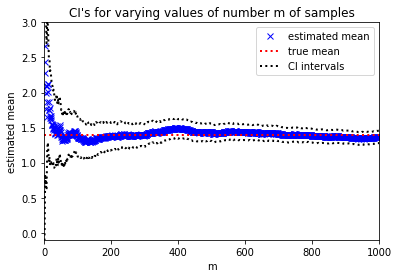

In [26]:
#now plot with matplotlib

#the following is to have matplotlib graphs included in your notebook, next to the code
%matplotlib inline

#Matplotlib(https://matplotlib.org):  2D plotting library
import matplotlib.pyplot as plt

#now plot the estimate MLE as a function of m
plt.plot(num_samples, estimated_means,'xb')
#to obtain control on the axis of the figure, so to customize laberls, limits, etc.
ax1 = plt.gca()
#set limit on x-axis
ax1.set_xlim(0, max_num_samples)
#set limit on y-axis
ax1.set_ylim(-0.1, 3)
#title of the plot
plt.title("CI's for varying values of number m of samples")
#label of x axis
plt.xlabel("m")
#label of y axis
plt.ylabel('estimated mean')
#now plot the correct value of p, just for reference
lines = plt.plot([0.0, max_num_samples],[true_mean, true_mean],'r:')
#change the width of the plotted line
plt.setp(lines, linewidth=2)
#plot the values from CI's upper bound
lines = plt.plot(num_samples,ubs,'k:')
#change the width of the plotted line
plt.setp(lines, linewidth=2)
#plot the values from CI's lower bound
lines = plt.plot(num_samples,lbs,'k:')
#change the width of the plotted line
plt.setp(lines, linewidth=2)
#add the personalized legend
plt.legend(['estimated mean','true mean','CI intervals'])
#change the size of the figure - if needed
#plt.rcParams['figure.figsize'] = (10,10)
#show the figure
plt.show()